# **CALORIES BURNT PREDICTION**




# **Methodology:**

*   Data Preprocessing and Visualization
*   Feature Selection
*   Feature Engineering
*   Model Selection
*   Model Training and Testing
*   Performance Evaluation

# **Importing Required Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# **Data Preprocessing and Visulization** 

In [5]:
calories_df=pd.read_csv('D:/SEMESTER 4/exercise.csv')
exercise_df=pd.read_csv('D:/SEMESTER 4/calories.csv')

In [6]:
calories_df

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8
...,...,...,...,...,...,...,...,...
14995,15644082,female,20,193.0,86.0,11.0,92.0,40.4
14996,17212577,female,27,165.0,65.0,6.0,85.0,39.2
14997,17271188,female,43,159.0,58.0,16.0,90.0,40.1
14998,18643037,male,78,193.0,97.0,2.0,84.0,38.3


In [7]:
exercise_df

,User_ID,Calories
0,14733363,231.0
1,14861698,66.0
2,11179863,26.0
3,16180408,71.0
4,17771927,35.0
...,...,...
14995,15644082,45.0
14996,17212577,23.0
14997,17271188,75.0
14998,18643037,11.0


In [8]:
import pandas as pd
df = pd.merge(exercise_df, calories_df, on="User_ID", how = 'inner')

In [9]:
df

,User_ID,Calories,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,231.0,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,66.0,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,26.0,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,71.0,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,35.0,female,27,154.0,58.0,10.0,81.0,39.8
...,...,...,...,...,...,...,...,...,...
14995,15644082,45.0,female,20,193.0,86.0,11.0,92.0,40.4
14996,17212577,23.0,female,27,165.0,65.0,6.0,85.0,39.2
14997,17271188,75.0,female,43,159.0,58.0,16.0,90.0,40.1
14998,18643037,11.0,male,78,193.0,97.0,2.0,84.0,38.3


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Calories    15000 non-null  float64
 2   Gender      15000 non-null  object 
 3   Age         15000 non-null  int64  
 4   Height      15000 non-null  float64
 5   Weight      15000 non-null  float64
 6   Duration    15000 non-null  float64
 7   Heart_Rate  15000 non-null  float64
 8   Body_Temp   15000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 1.1+ MB


**As we can see there are no NAN values present in any column.**

In [11]:
df.drop(['User_ID'],axis=1,inplace=True)
df

,Calories,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,231.0,male,68,190.0,94.0,29.0,105.0,40.8
1,66.0,female,20,166.0,60.0,14.0,94.0,40.3
2,26.0,male,69,179.0,79.0,5.0,88.0,38.7
3,71.0,female,34,179.0,71.0,13.0,100.0,40.5
4,35.0,female,27,154.0,58.0,10.0,81.0,39.8
...,...,...,...,...,...,...,...,...
14995,45.0,female,20,193.0,86.0,11.0,92.0,40.4
14996,23.0,female,27,165.0,65.0,6.0,85.0,39.2
14997,75.0,female,43,159.0,58.0,16.0,90.0,40.1
14998,11.0,male,78,193.0,97.0,2.0,84.0,38.3


In [12]:
df.describe()

,Calories,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
count,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,89.539533,42.789800,174.465133,74.966867,15.530600,95.518533,40.025453
std,62.456978,16.980264,14.258114,15.035657,8.319203,9.583328,0.779230
min,1.000000,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000
25%,35.000000,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000
50%,79.000000,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000
75%,138.000000,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000
max,314.000000,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000


# **Data Visualization**

In [13]:
sns.set()

<AxesSubplot:xlabel='Gender', ylabel='count'>

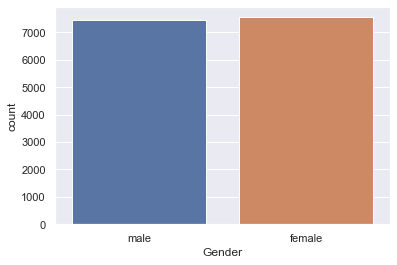

In [14]:
sns.countplot(x="Gender",data=df)

**Distribution Plot of every feature**

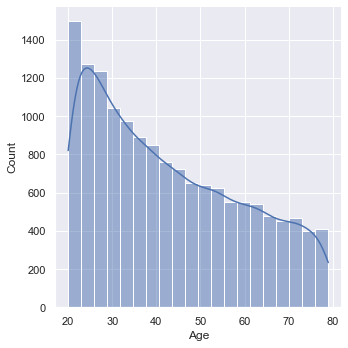

In [15]:
sns.displot(df['Age'], kde=True, bins=20)

More the age, Less the number of people participation in exercise.

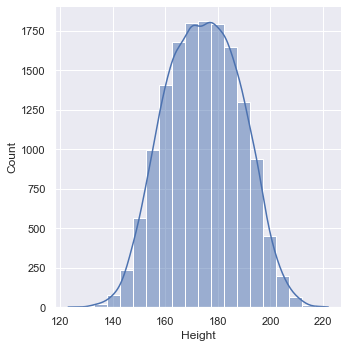

In [16]:
sns.displot(df['Height'], kde=True,bins=20)

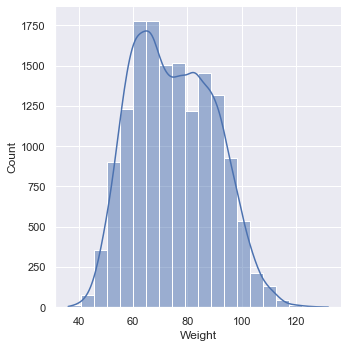

In [17]:
sns.displot(df['Weight'], kde=True,bins=20)

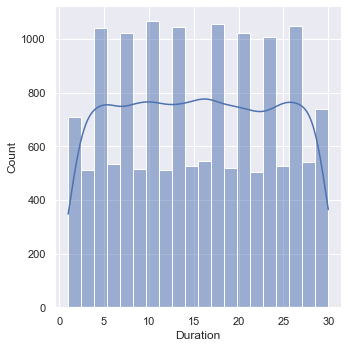

In [18]:
sns.displot(df['Duration'], kde=True,bins=20)

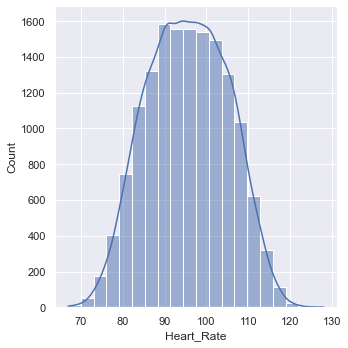

In [19]:
sns.displot(df['Heart_Rate'], kde=True,bins=20)

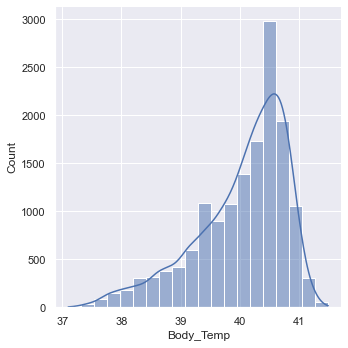

In [20]:
sns.displot(df['Body_Temp'], kde=True,bins=20)

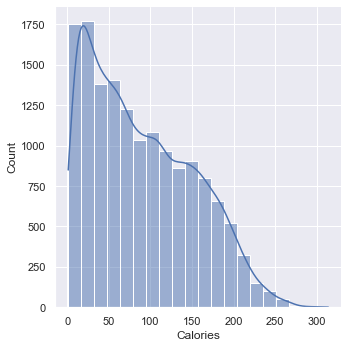

In [21]:
sns.displot(df['Calories'], kde=True,bins=20)

**Plotting Boxplots**

Text(0.5, 1.0, 'Boxplots')

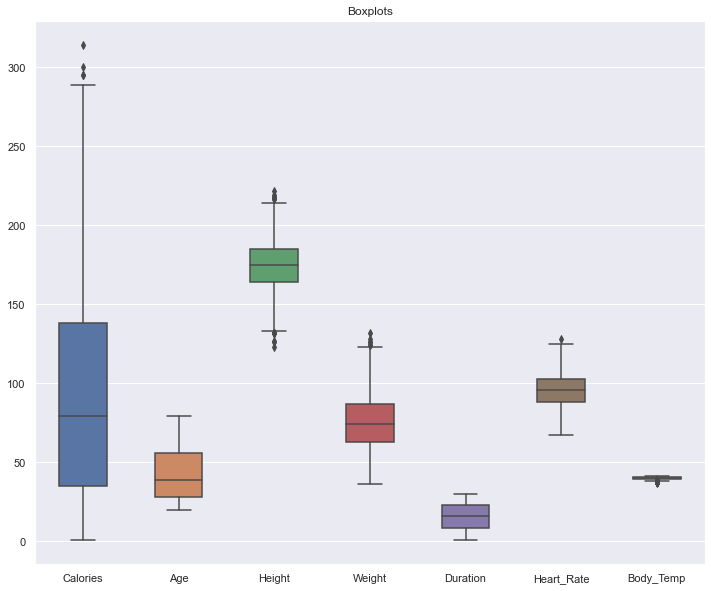

In [22]:
fig,ax = plt.subplots(figsize=(12,10))
sns.boxplot(data=df,width=0.5)
plt.title("Boxplots")

# **Calculating Percentage of Outliers in each column**

In [23]:
def percent_outliers(df):
    percent_outliers = pd.DataFrame()
    first_col = True
    for col in df.columns:
        if np.issubdtype(df[col].dtype, np.number) and not df[col].isnull().all():
            q1, q3 = np.percentile(df[col], [25, 75])
            iqr = q3 - q1
            lower_bound = q1 - 1.5 * iqr
            upper_bound = q3 + 1.5 * iqr
            num_outliers = len(df[(df[col] < lower_bound) | (df[col] > upper_bound)])
            percent_outliers[col] = [100 * num_outliers / len(df)]
            first_col = False
        elif not first_col:
            percent_outliers[col] = [0]
        else:
            first_col = False
    return percent_outliers


print(percent_outliers(df))

   Calories  Gender  Age    Height  Weight  Duration  Heart_Rate  Body_Temp
0  0.026667       0  0.0  0.093333    0.04       0.0    0.006667       2.46


# **Correlation Matrix**

<AxesSubplot:>

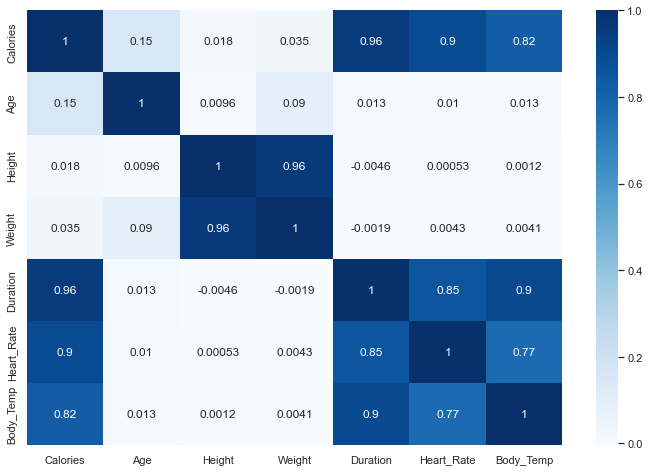

In [24]:
plt.figure(figsize=(12, 8))
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='Blues')

*  **Age, Height and Weight are not much correlated with Calories.**
* B**ody_Temp, Heart_Rate and Duration are highly correlated with calories**
   


# **Plotting Scatterplot for all independent features with target feature (which are highly correlated)**

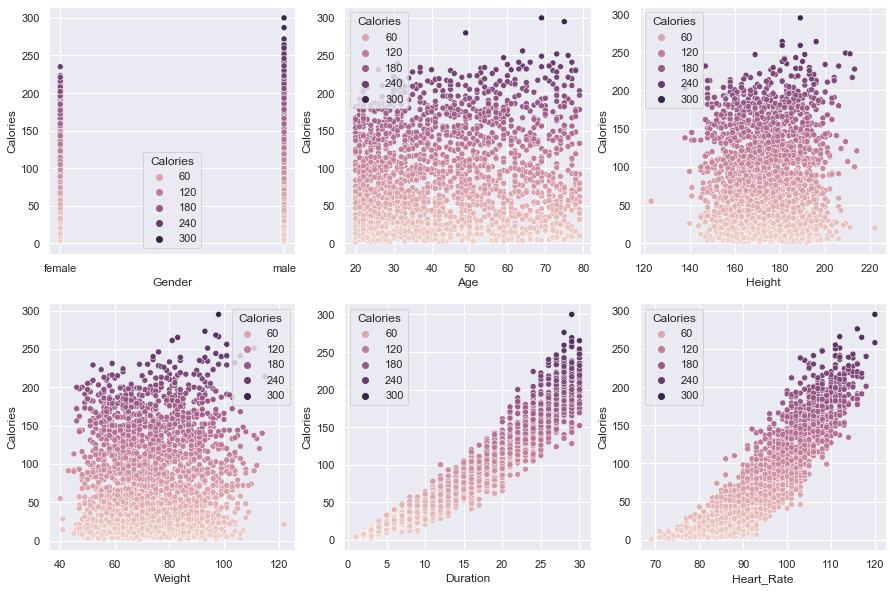

In [25]:
y_axis = df.iloc[:,1:-1]
plt.subplots(figsize=(15,10))

for i,col in enumerate(y_axis):
  plt.subplot(2,3,i+1)
  x = df.sample(2000)
  sns.scatterplot(x=x[col], y=x['Calories'],hue=df['Calories'])
  
plt.show()

# **Linear Regression on all the features**

In [26]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Gender']= le.fit_transform(df['Gender'])
df

,Calories,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,231.0,1,68,190.0,94.0,29.0,105.0,40.8
1,66.0,0,20,166.0,60.0,14.0,94.0,40.3
2,26.0,1,69,179.0,79.0,5.0,88.0,38.7
3,71.0,0,34,179.0,71.0,13.0,100.0,40.5
4,35.0,0,27,154.0,58.0,10.0,81.0,39.8
...,...,...,...,...,...,...,...,...
14995,45.0,0,20,193.0,86.0,11.0,92.0,40.4
14996,23.0,0,27,165.0,65.0,6.0,85.0,39.2
14997,75.0,0,43,159.0,58.0,16.0,90.0,40.1
14998,11.0,1,78,193.0,97.0,2.0,84.0,38.3


In [27]:
x = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [28]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import StandardScaler

In [29]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(x,y, test_size=0.3, random_state=42)

In [30]:
regressor1 = LinearRegression()
regressor1.fit(X_train1, y_train1)
y_pred1 = regressor1.predict(X_test1)

**Metrics**

In [31]:
score_list1=[]

score1 = regressor1.score(X_test1, y_test1)
score_list1.append(score1)
from sklearn.metrics import mean_absolute_error
mae1 = mean_absolute_error(y_test1, y_pred1)
score_list1.append(mae1)
from sklearn.metrics import mean_squared_error
mse1 = mean_squared_error(y_test1, y_pred1)
score_list1.append(mse1)
score_df1 = pd.DataFrame(score_list1, index =['R2 Score','Mean Absolute Error','Mean Squared Error'],
                                              columns =['Scores'])
score_df1.index.name='Metrics'
score_df1

,Scores
Metrics,
R2 Score,0.850631
Mean Absolute Error,0.230214
Mean Squared Error,0.088794


**Coefficients**

In [32]:
# print("Coeff: ",regressor1.coef_)
index_values = ["Gender",	"Age",	"Height",	"Weight",	"Duration",	"Heart_Rate",	"Body_Temp"]
column_values = ['coefficients']
regressor1_coeff=pd.DataFrame(regressor1.coef_,index = index_values, columns = column_values)
regressor1_coeff.index.name ='Features'
regressor1_coeff

,coefficients
Features,
Gender,-0.012050
Age,-0.016273
Height,0.006093
Weight,-0.002064
Duration,0.003813
Heart_Rate,0.147384
Body_Temp,0.024075


**Intercept**

In [33]:
print("Intercept: ",regressor1.intercept_)

Intercept:  36.33447608697037


# **Applying Multiple Linear Regression on Selected Features**

We are taking **3 features** for prediction, namely 'Body_Temp', 'Heart_Rate',  'Duration' since they are highly corelated with the target feature.

In [34]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [35]:
# Split data into training and testing sets
X_train2, X_test2, y_train2, y_test2 = train_test_split(df[['Body_Temp','Heart_Rate','Duration']], df['Calories'], test_size=0.3, random_state=42)

In [36]:
# Train the model
regressor2 = LinearRegression()
regressor2.fit(X_train2, y_train2)

LinearRegression()

In [37]:
# Make predictions on the test set
y_pred2 = regressor2.predict(X_test2)

In [38]:
# print(type(X_train2))
# print(y_train2)
a=[[40.8,105.0,29]]
arr = np.array(a)
z=regressor2.predict(arr)
print(z)

[184.52038913]


**Metrics**


In [39]:
# Evaluate the model
score2 = regressor2.score(X_test2, y_test2)
score_list2=[]
score_list2.append(score2)
mae2 = mean_absolute_error(y_test2, y_pred2)
score_list2.append(mae2)
mse2 = mean_squared_error(y_test2, y_pred2)
score_list2.append(mse2)
score_df2 = pd.DataFrame(score_list2, index =['R2 Score','Mean Absolute Error','Mean Squared Error'],
                                              columns =['Scores'])
score_df2.index.name='Metrics'
score_df2

,Scores
Metrics,
R2 Score,0.945070
Mean Absolute Error,10.659186
Mean Squared Error,216.831304


**Coefficient Values**

In [40]:
index_values2 = ["Body_Temp","Heart_Rate","Duration"	]
column_values2 = ['coefficients']
regressor2_coeff=pd.DataFrame(regressor2.coef_,index = index_values2, columns = column_values2)
regressor2_coeff.index.name ='Features'
regressor2_coeff

,coefficients
Features,
Body_Temp,-16.672459
Heart_Rate,2.000133
Duration,6.611153


Intercept

In [41]:
print("Intercept: ",regressor2.intercept_)

Intercept:  463.0193202264075


# **Applying Polynomial Regression**

In [42]:
from sklearn.preprocessing import PolynomialFeatures

In [43]:
X_train3, X_test3, y_train3, y_test3 = train_test_split(df[['Body_Temp','Heart_Rate','Duration']], df['Calories'], test_size=0.3, random_state=42)
# Create polynomial features up to degree 2
poly = PolynomialFeatures(degree=2)
x_poly = poly.fit_transform(X_train3)
y_train3 = y_train3.values.reshape(-1, 1)
y_test3 = y_test3.values.reshape(-1,1)
# Train a linear regression model on the transformed data
model = LinearRegression()
model.fit(x_poly,y_train3)

LinearRegression()

In [44]:
y_pred3=model.predict(poly.fit_transform(X_test3))

In [45]:
# print(y_pred3)

In [46]:
# print(y_test3.shape)

In [47]:
from sklearn.metrics import r2_score
score3 =r2_score(y_test3, y_pred3)

In [48]:
# Evaluate the model
score_list3=[]
score_list3.append(score3)
mae3 = mean_absolute_error(y_test3, y_pred3)
score_list3.append(mae3)
mse3 = mean_squared_error(y_test3, y_pred3)
score_list3.append(mse3)
score_df3 = pd.DataFrame(score_list3, index =['R2 Score','Mean Absolute Error','Mean Squared Error'],
                                              columns =['Scores'])
score_df3.index.name='Metrics'
score_df3

,Scores
Metrics,
R2 Score,0.961216
Mean Absolute Error,8.296657
Mean Squared Error,153.098185


In [49]:
# index_values2 = ["Body_Temp","Heart_Rate","Duration"	]
# column_values2 = ['coefficients']
# regressor2_coeff=pd.DataFrame( model.coef_,index = index_values2, columns = column_values2)
# regressor2_coeff.index.name ='Features'
# regressor2_coeff
model.coef_

array([[ 0.00000000e+00,  6.68349523e+01, -1.65472755e+00,
        -1.45100540e+01, -9.39775398e-01,  6.19786363e-02,
         1.79214643e-01, -4.78570314e-03,  1.35403929e-01,
        -1.36571020e-02]])

In [50]:
model.intercept_

array([-1207.56179666])

# **Clustering (with the 3 highly correlated data)**

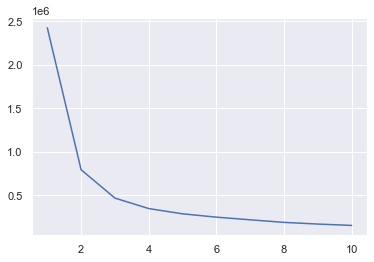

In [51]:
# FINDING THE OPTIMAL NUMBER OF CLASS

from sklearn.cluster import KMeans
wcss = []
xx = df[['Body_Temp','Heart_Rate','Duration']]
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++' , max_iter =300,n_init=10,random_state=0)
    kmeans.fit(xx)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)

In [52]:
kmean = KMeans(n_clusters = 3, init = 'k-means++' , max_iter =300,n_init=10,random_state=0)
y_kmeans = kmean.fit_predict(xx)
y_kmeans

array([0, 2, 1, ..., 2, 1, 2])

In [53]:
y_kmeanss = pd.DataFrame(y_kmeans,columns = ["predict"])
y_kmeanss.nunique()
y_kmeanss

,predict
0,0
1,2
2,1
3,2
4,1
...,...
14995,2
14996,1
14997,2
14998,1


<AxesSubplot:>

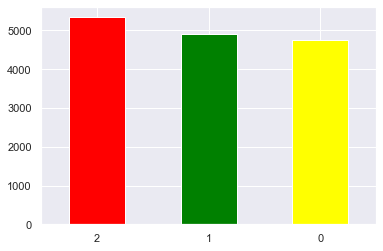

In [54]:
y_kmeanss['predict'].value_counts().plot.bar(rot=0, color = ['red','green','yellow'])

In [55]:
from mpl_toolkits.mplot3d import Axes3D
import plotly.graph_objs as go
from plotly import tools
from plotly.subplots import make_subplots
import plotly.offline as py

In [56]:
x_label = df[['Duration','Heart_Rate','Body_Temp']].values
x_label

array([[ 29. , 105. ,  40.8],
       [ 14. ,  94. ,  40.3],
       [  5. ,  88. ,  38.7],
       ...,
       [ 16. ,  90. ,  40.1],
       [  2. ,  84. ,  38.3],
       [ 18. ,  92. ,  40.5]])

In [57]:
# 3d scatterplot using plotly
Scene = dict(xaxis = dict(title  = 'Duration'),yaxis = dict(title  = 'Heart Rate'),zaxis = dict(title  = 'Body Temperature'))

# model.labels_ is nothing but the predicted clusters i.e y_clusters
labels = kmean.labels_
trace = go.Scatter3d(x=x_label[:, 0], y=x_label[:, 1], z=x_label[:, 2], mode='markers',marker=dict(color = labels, size= 10, line=dict(color= 'black',width = 10)))
layout = go.Layout(margin=dict(l=0,r=0),scene = Scene,height = 800,width = 800)
data = [trace]
fig = go.Figure(data = data, layout = layout)
fig.show()